<a href="https://colab.research.google.com/github/swopnimghimire-123123/Maths_For_ML/blob/main/Calculus_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integration and the Fundamental Theorem of Calculus

## 1. Integration
- Integration is the inverse of differentiation.
- It measures the **area under a curve**.
- Indefinite integral:
  \[
  \int f(x) dx = F(x) + C
  \]
  where F'(x) = f(x) and C is the constant of integration.
- Definite integral:
  \[
  \int_a^b f(x) dx
  \]
  gives the area under f(x) from x = a to x = b.

## 2. Fundamental Theorem of Calculus (FTC)
- **Part 1**: If F(x) = ∫[a to x] f(t) dt, then F'(x) = f(x).  
  > The derivative of the integral gives back the original function.
- **Part 2**: If F is an antiderivative of f, then:
  \[
  \int_a^b f(x) dx = F(b) - F(a)
  \]
  > You can compute a definite integral by evaluating any antiderivative at the bounds.


In [ ]:
import sympy as sp

# Define symbol
x = sp.symbols('x')

# Example function
f = x**2

# Indefinite integral
indefinite = sp.integrate(f, x)

# Definite integral from 0 to 2
definite = sp.integrate(f, (x, 0, 2))

print("Indefinite integral ∫ x^2 dx =", indefinite)
print("Definite integral ∫[0 to 2] x^2 dx =", definite)


Indefinite integral ∫ x^2 dx = x**3/3
Definite integral ∫[0 to 2] x^2 dx = 8/3


Indefinite integral ∫ sin(x) dx = -cos(x)
Definite integral ∫[0 to pi] sin(x) dx = 2
Integral as a function of upper bound: 1 - cos(F(x))
Numerical approximation of ∫[0 to pi] sin(x) dx = 1.9999983517708517


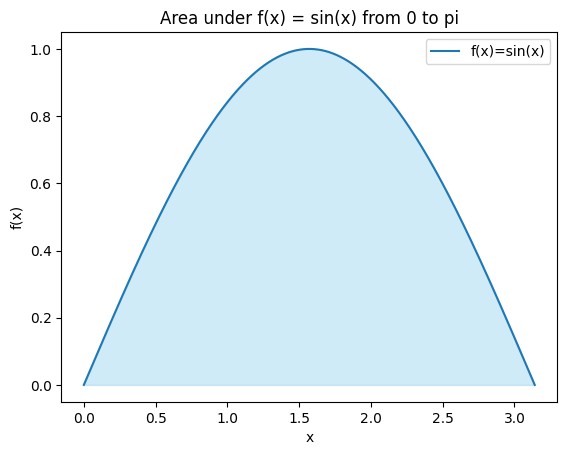

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the symbol
x = sp.symbols('x')

# Example function
f = sp.sin(x)  # Let's try f(x) = sin(x)

# 1️ Indefinite integral
indef_integral = sp.integrate(f, x)
print("Indefinite integral ∫ sin(x) dx =", indef_integral)

# 2️ Definite integral from 0 to pi
def_integral = sp.integrate(f, (x, 0, sp.pi))
print("Definite integral ∫[0 to pi] sin(x) dx =", def_integral)

# 3️ Using the FTC concept: integral as a function of upper bound
F = sp.Function('F')(x)
FTC_func = sp.integrate(f, (x, 0, F))
print("Integral as a function of upper bound:", FTC_func)

# 4️ Numerical check using numpy
f_np = lambda x: np.sin(x)
x_vals = np.linspace(0, np.pi, 1000)
dx = x_vals[1] - x_vals[0]
area_approx = np.sum(f_np(x_vals) * dx)
print("Numerical approximation of ∫[0 to pi] sin(x) dx =", area_approx)

# 5️ Visualization: area under the curve
plt.plot(x_vals, f_np(x_vals), label='f(x)=sin(x)')
plt.fill_between(x_vals, f_np(x_vals), color='skyblue', alpha=0.4)
plt.title('Area under f(x) = sin(x) from 0 to pi')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


# Car Motion and Integration

Suppose a car is moving along a straight road, and its velocity at time t is v(t).  

1. **Velocity and Position**:  
   - Velocity is the rate of change of position: v(t) = dx/dt.  
   - Position x(t) can be recovered by integrating the velocity:
     \[
     x(t) = x(t_0) + \int_{t_0}^{t} v(\tau) d\tau
     \]
   - Here, the integral sums up all the "small distances" the car travels over time.

2. **FTC Connection**:  
   - The derivative of the position function gives velocity:
     \[
     \frac{dx}{dt} = v(t)
     \]  
   - Conversely, integrating velocity over time gives the net change in position:
     \[
     x(t) - x(t_0) = \int_{t_0}^{t} v(t) dt
     \]

3. **Intuition**:  
   - Integration accumulates tiny changes (velocity × small time intervals) to find the total displacement.
   - This is the exact same process as computing the **area under the velocity-time curve**.


Position function x(t) = 3*t**2/2 + 2*t + C
Displacement from t=0 to t=4: 32


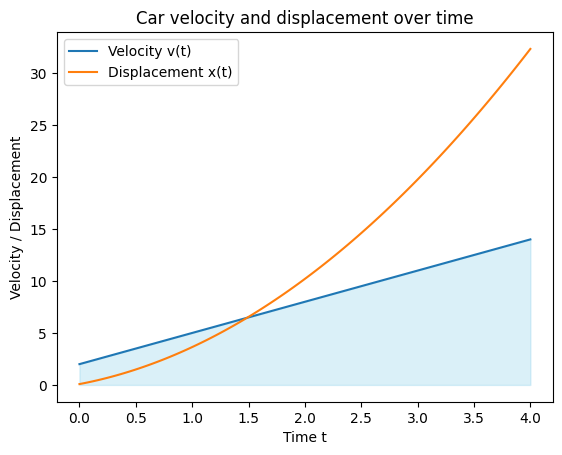

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Symbolic variable for time
t = sp.symbols('t')

# Example velocity function: v(t) = 3*t + 2
v = 3*t + 2

# 1️ Position function via indefinite integration
x = sp.integrate(v, t)
print("Position function x(t) =", x, "+ C")

# 2️ Definite displacement from t=0 to t=4
displacement = sp.integrate(v, (t, 0, 4))
print("Displacement from t=0 to t=4:", displacement)

# 3️ Numerical simulation & plot
t_vals = np.linspace(0, 4, 100)
v_vals = 3*t_vals + 2
dx_vals = v_vals * (t_vals[1] - t_vals[0])
x_cumulative = np.cumsum(dx_vals)

plt.plot(t_vals, v_vals, label='Velocity v(t)')
plt.plot(t_vals, x_cumulative, label='Displacement x(t)')
plt.fill_between(t_vals, 0, v_vals, color='skyblue', alpha=0.3)
plt.title('Car velocity and displacement over time')
plt.xlabel('Time t')
plt.ylabel('Velocity / Displacement')
plt.legend()
plt.show()


# Why Derivative and Integral are Inverses

1. **Derivative**: measures the **instantaneous rate of change**.  
   - If x(t) is position, dx/dt = v(t) is velocity.  
   - It tells us "how fast" something is changing at each instant.

2. **Integral**: measures **accumulated change**.  
   - If v(t) is velocity, ∫ v(t) dt = displacement is total change.  
   - It "adds up" all the tiny changes over time.

3. **Inverse Relationship**:  
   - If you **differentiate** an integral of a function, you get the original function back:
     \[
     \frac{d}{dx} \int_a^x f(t) dt = f(x)
     \]  
   - Conversely, integrating a derivative gives back the net change:
     \[
     \int_a^b f'(x) dx = f(b) - f(a)
     \]

4. **Intuition with Car Example**:  
   - Velocity v(t) = dx/dt. If you integrate v(t), you get x(t) – the **original position function** (up to a constant).  
   - Derivative zooms in to measure **instantaneous slope**, integral zooms out to sum **accumulated change**.  
   - They “undo” each other: derivative slices, integral sums.


Original function f(x) = x**2
Derivative f'(x) = 2*x
Integral of derivative ∫ f'(x) dx = x**2 + C


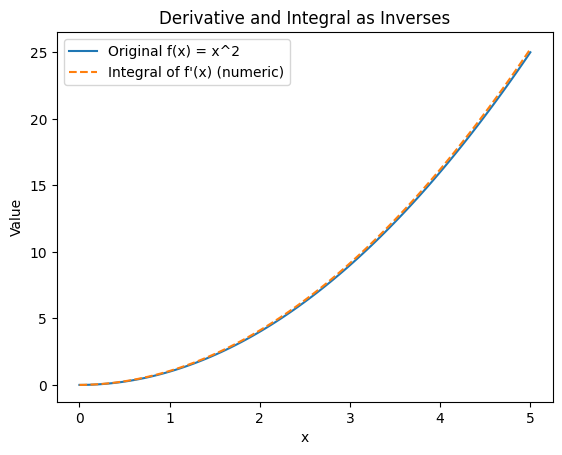

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Symbolic variable
x = sp.symbols('x')

# Example function: f(x) = x^2
f = x**2

# 1️ Derivative
f_prime = sp.diff(f, x)

# 2️ Integral of the derivative
f_recovered = sp.integrate(f_prime, x)

print("Original function f(x) =", f)
print("Derivative f'(x) =", f_prime)
print("Integral of derivative ∫ f'(x) dx =", f_recovered, "+ C")

# 3️ Numeric visualization
x_vals = np.linspace(0, 5, 100)
f_vals = x_vals**2
f_prime_vals = 2*x_vals
dx = x_vals[1] - x_vals[0]
f_integral_vals = np.cumsum(f_prime_vals * dx)  # approximate integral

plt.plot(x_vals, f_vals, label='Original f(x) = x^2')
plt.plot(x_vals, f_integral_vals, '--', label='Integral of f\'(x) (numeric)')
plt.title('Derivative and Integral as Inverses')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.show()


# What Does Area Have to Do With Slope?

1. **Slope (Derivative)**:
   - The derivative measures the **instantaneous rate of change** of a function.
   - Geometrically, it’s the **slope of the tangent line** at a point on the curve.

2. **Area (Integral)**:
   - The integral measures the **total accumulation** of a quantity.
   - Geometrically, it’s the **area under the curve** between two points.

3. **Connecting the Two**:
   - If you plot a velocity function v(t) vs time t:
     - **Slope** at a point = instantaneous acceleration (rate of change of velocity).
     - **Area under v(t)** between t1 and t2 = total displacement (distance traveled).
   - So slope tells you how fast something is changing, area tells you how much has changed in total.
   - **Fundamental Theorem of Calculus**: taking the slope of the accumulated area gives back the original function.  

4. **Intuition**:
   - Think of velocity as “how steeply the position is rising.”  
   - Integrating velocity adds up all the little "slopes" (small displacements) to give total change.
   - Slope ↔ derivative ↔ rate of change,  
     Area ↔ integral ↔ accumulated total.


# Higher Order Derivatives

1. **Definition**:
   - The **first derivative** f′(x) gives the rate of change (slope).
   - The **second derivative** f′′(x) is the derivative of the derivative, describing how the rate of change itself changes.
   - In general, the n-th derivative is obtained by repeatedly differentiating n times.

2. **Notation**:
   - First derivative: f′(x) or dy/dx
   - Second derivative: f′′(x) or d²y/dx²
   - n-th derivative: f⁽ⁿ⁾(x) or dⁿy/dxⁿ

3. **Geometric / Physical Meaning**:
   - f′(x): slope (e.g., velocity if f is position).
   - f′′(x): concavity (e.g., acceleration).
   - f⁽³⁾(x): rate of change of acceleration (e.g., jerk).
   - Higher derivatives capture deeper layers of change.

4. **Example**:
   - If f(x) = x³,
     - f′(x) = 3x²
     - f′′(x) = 6x
     - f⁽³⁾(x) = 6
     - f⁽⁴⁾(x) = 0 (all higher derivatives vanish).


In [ ]:
import sympy as sp

# Variable
x = sp.symbols('x')

# Example function
f = x**3 + 2*x**2 - 5*x + 7

# First, second, third, fourth derivatives
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)
f4 = sp.diff(f3, x)

print("f(x) =", f)
print("f'(x) =", f1)
print("f''(x) =", f2)
print("f'''(x) =", f3)
print("f''''(x) =", f4)


f(x) = x**3 + 2*x**2 - 5*x + 7
f'(x) = 3*x**2 + 4*x - 5
f''(x) = 6*x + 4
f'''(x) = 6
f''''(x) = 0
